# Importing dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fast')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading csv file
df = pd.read_csv('data_science_job.csv')

# Chossing a style ( can see the list using the code : plt.style.available
plt.style.use('default')

# Introductory EDA

In [2]:
# Checking the shape of the dataframe
df.shape

(19158, 13)

In [3]:
# Checking any 5 random rows
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
6377,19633,city_21,0.624,NaN,Has relevent experience,Full time course,Masters,STEM,5.0,100-500,NaN,28.0,1.0
12719,23747,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,130.0,1.0
12777,26988,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Public Sector,57.0,1.0
14270,13364,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,3.0,10/49,Pvt Ltd,23.0,0.0
18239,13219,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.0,10/49,Funded Startup,161.0,0.0


In [4]:
# Checking data type of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
# Optimizing the memory by using appropriate data types
int_cols = df.select_dtypes(include=np.int64)
float_cols = df.select_dtypes(include=np.float64)

df[int_cols.columns] = df[int_cols.columns].astype(np.int32)
df[float_cols.columns] = df[float_cols.columns].astype(np.float32)

In [6]:
# Descriptive information about the data
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928037,65.185791,0.249348
std,9616.292592,0.123334,6.505268,59.885624,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [7]:
# Checking percentage of null values
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
# Checking duplicated values
df.duplicated().sum()

0

<Axes: ylabel='target'>

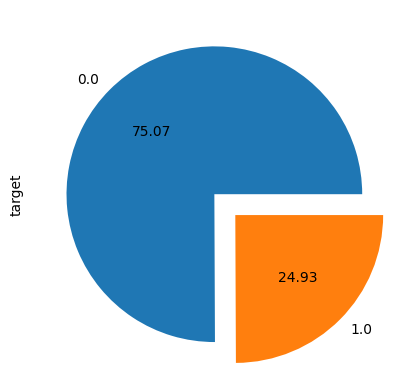

In [9]:
# Let's visualize distribution of the classes in the target variable
ex = (0,0.2)
df['target'].value_counts().plot(kind='pie',autopct='%.2f',explode= ex)

# Data Cleaning

In this step we will be handling the missing values,outliers and will also work on dealing with imbalanced data


In [10]:
# Dropping the unnecessary columns from the dataframe
df = df.drop(['enrollee_id','city'],axis=1)
df.head(3)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0


In [11]:
# Let's take out features having missing value percentage less than 5% 
cols_less5_per = [col for col in df.columns if df[col].isnull().mean()*100 <5 and df[col].isnull().mean()*100>0]


# Let's create 2 copy to compare the change in distribution
remove_nan = df[cols_less5_per].copy()
impute_nan = df[cols_less5_per].copy()

In [12]:
# Dropping all the rows having column values as NaN
remove_nan.dropna(inplace=True)

Since city_development_index, experience and training hours are numerical features so we will use mean imputation, whereas for the remaining features we will do mode imputation.

In [13]:
# Mean imputation
impute_nan['city_development_index'].fillna(df['city_development_index'].mean(),inplace=True)
impute_nan['experience'].fillna(df['city_development_index'].mean(),inplace=True)
impute_nan['training_hours'].fillna(df['city_development_index'].mean(),inplace=True)

# Mode imputation
impute_nan['enrolled_university'].fillna(impute_nan['enrolled_university'].mode().values[0],inplace=True)
impute_nan['education_level'].fillna(impute_nan['education_level'].mode().values[0],inplace=True)

[Text(0.5, 1.0, 'Distribution comparision of training hours')]

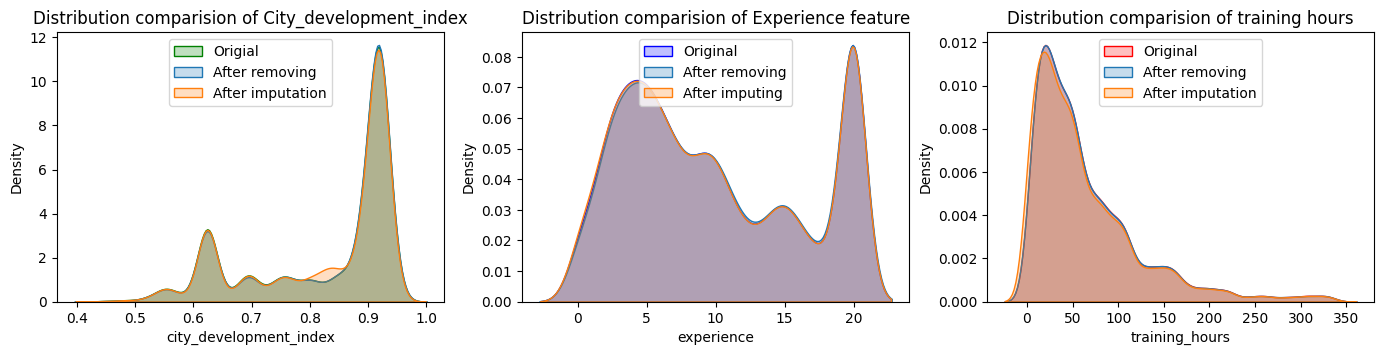

In [14]:
# Now let's visualize the distributions before and after implemnting CCA on numerical features
fig, ax = plt.subplots(1, 3, figsize=(17, 3.5))

sns.kdeplot(df['city_development_index'], fill=True,ax=ax[0], color='green', label='Origial')
sns.kdeplot(remove_nan['city_development_index'], fill=True,ax=ax[0], label='After removing')
sns.kdeplot(impute_nan['city_development_index'], fill=True,ax=ax[0], label='After imputation')
ax[0].legend(loc='upper center')
ax[0].set(title='Distribution comparision of City_development_index')

sns.kdeplot(df['experience'], fill=True,ax=ax[1], color='blue', label='Original')
sns.kdeplot(remove_nan['experience'], fill=True,ax=ax[1], label='After removing')
sns.kdeplot(impute_nan['experience'], fill=True,ax=ax[1], label='After imputing')
ax[1].legend(loc='upper center')
ax[1].set(title='Distribution comparision of Experience feature')

sns.kdeplot(df['training_hours'], fill=True,ax=ax[2], color='red', label='Original')
sns.kdeplot(remove_nan['training_hours'], fill=True,ax=ax[2], label='After removing')
sns.kdeplot(impute_nan['training_hours'], fill=True,ax=ax[2], label='After imputation')
ax[2].legend(loc='upper center')
ax[2].set(title='Distribution comparision of training hours')

For the categorical columns we will check the ratio of categories before and after applying PCA

In [15]:
# For the categorical features we will check the ratio of classes before and after implementing CCA
compare_eu = pd.concat([df['enrolled_university'].value_counts() / len(df),
                    remove_nan['enrolled_university'].value_counts() / len(remove_nan),
                    impute_nan['enrolled_university'].value_counts()/len(impute_nan)],axis=1)

compare_eu.columns = ['Original','After removing','After imputation']
compare_eu

,Original,After removing,After imputation
no_enrollment,0.721213,0.735188,0.741361
Full time course,0.196106,0.200733,0.196106
Part time course,0.062533,0.064079,0.062533


In [16]:
compare_edu_level = pd.concat([ df['education_level'].value_counts() / len(df),
                        remove_nan['education_level'].value_counts() / len(remove_nan),
                        impute_nan['education_level'].value_counts()/len(impute_nan)],axis=1)

compare_edu_level.columns = ['Original','After removing','After imputation']
compare_edu_level

,Original,After removing,After imputation
Graduate,0.605387,0.619835,0.629398
Masters,0.227633,0.234082,0.227633
High School,0.105282,0.107380,0.105282
Phd,0.021610,0.022116,0.021610
Primary School,0.016077,0.016587,0.016077


Let's now impute and remove missing values based the above analysis.

In [17]:
# Dropping missing values in original dataframe
df.dropna(subset = ['city_development_index'],inplace=True)

# Mean value imputation in original dataframe
df['experience'].fillna(df['city_development_index'].mean(),inplace=True)
df['training_hours'].fillna(df['city_development_index'].mean(),inplace=True)

# Mode value imputation in original dataframe
df['enrolled_university'].fillna(df['enrolled_university'].mode().values[0],inplace=True)
df['education_level'].fillna(df['education_level'].mode().values[0],inplace=True)

Before dealing with features having missing value more than 5% let's first visualize the distribution of city_development_index and training_hours to decide which method to use for the detection and removal of outliers. 

## Detection and removal of outliers

C:\Users\cwmed\AppData\Local\Temp\ipykernel_11300\2367291909.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['training_hours'],shade=True,ax = ax[0])
C:\Users\cwmed\AppData\Local\Temp\ipykernel_11300\2367291909.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['city_development_index'],shade=True,ax = ax[1])


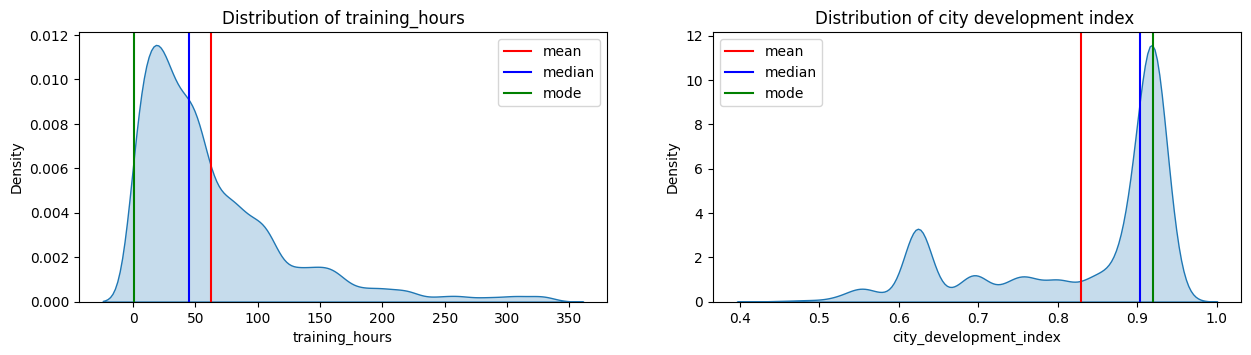

In [18]:
fig,ax = plt.subplots(1,2,figsize = (15,3.5))

sns.kdeplot(df['training_hours'],shade=True,ax = ax[0])
ax[0].set(title='Distribution of training_hours')
ax[0].axvline(df['training_hours'].mean(),label = 'mean',color = 'red')
ax[0].axvline(df['training_hours'].median(),label = 'median',color = 'blue')
ax[0].axvline(df['training_hours'].mode().values[0],label = 'mode',color = 'green')
ax[0].legend()

sns.kdeplot(df['city_development_index'],shade=True,ax = ax[1])
ax[1].set(title='Distribution of city development index ')
ax[1].axvline(df['city_development_index'].mean(),label = 'mean',color = 'red')
ax[1].axvline(df['city_development_index'].median(),label = 'median',color = 'blue')
ax[1].axvline(df['city_development_index'].mode().values[0],label = 'mode',color = 'green')
ax[1].legend()

From the distributions we can clearly see that both the features are skewed. Training_hours feature is right skewed whereas city_development_index feature is left skewed. So we will use IQR method to detect outliers and handle outliers.

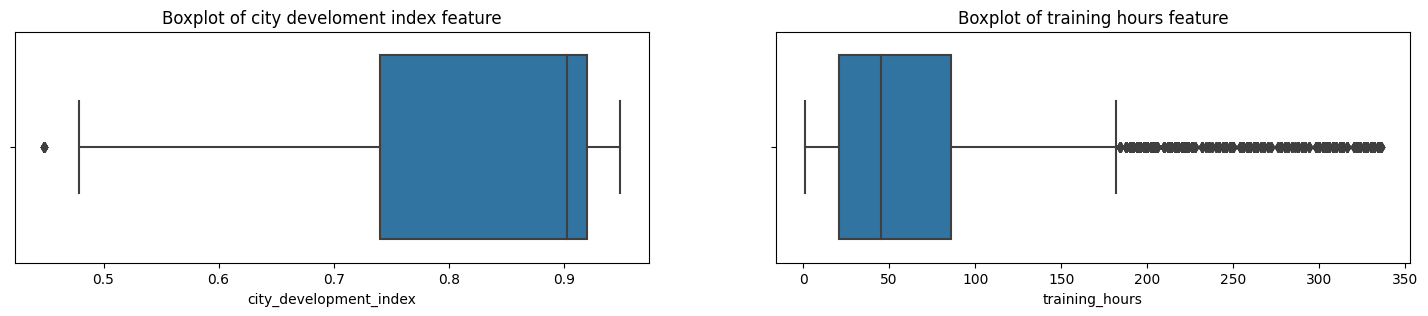

In [19]:
# Create a figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18, 3))

# Let's visualize the outliers using the boxplots
sns.boxplot(x = df['city_development_index'],ax = ax[0]).set(title='Boxplot of city develoment index feature')
sns.boxplot(x = df['training_hours'],ax = ax[1]).set(title='Boxplot of training hours feature')

# Show the plot
plt.show()

Before removing or capping outliers let's create a copy of these features so that after either removing or capping outliers we could visualize the change in the distribution.

In [20]:
remove_outliers = df[['city_development_index','training_hours']].copy()
cap_outliers = df[['city_development_index','training_hours']].copy()

In [21]:
# Let's create a function for finding Uppper and lower limit
def find_limits(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3-q1
    Upper_lmt = q3 + 1.5*IQR
    Lower_lmt = q1 - 1.5*IQR
    return [Upper_lmt,Lower_lmt]

In [22]:
# Calling the function to find the limits
lmts_city_dev_index = find_limits(remove_outliers['city_development_index'])
lmts_trainng_hrs = find_limits(remove_outliers['training_hours'])

In [23]:
# Let's first cap the outliers
cap_outliers['city_development_index'] = np.where(
                                            cap_outliers['city_development_index']>lmts_city_dev_index[0],lmts_city_dev_index[0],
                                            np.where(cap_outliers['city_development_index']<lmts_city_dev_index[1],lmts_city_dev_index[1],
                                            cap_outliers['city_development_index']))
    
cap_outliers['training_hours'] = np.where(
                                            cap_outliers['training_hours']>lmts_trainng_hrs[0],lmts_trainng_hrs[0],
                                            np.where(cap_outliers['training_hours']<lmts_trainng_hrs[1],lmts_trainng_hrs[1],
                                            cap_outliers['training_hours']))

In [24]:
# Let's now remove the outliers
remove_outliers['city_development_index'] = remove_outliers['city_development_index'][remove_outliers['city_development_index'] > lmts_city_dev_index[1]]
remove_outliers['training_hours'] = remove_outliers['training_hours'][remove_outliers['training_hours'] < lmts_trainng_hrs[0]]

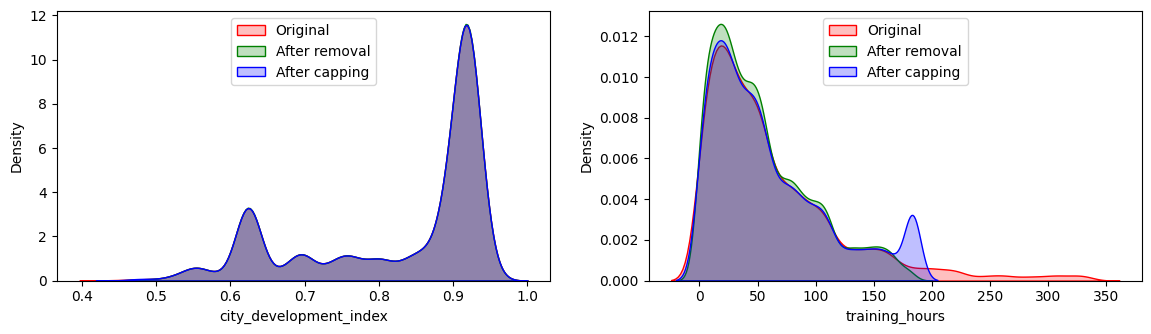

In [25]:
# Now lets visualize the change in the distribution before and after capping the outliers
fig,ax = plt.subplots(1,2,figsize = (14,3.5))

sns.kdeplot(df['city_development_index'],fill=True,color='red',label='Original',ax = ax[0]).legend(loc='upper center')
sns.kdeplot(remove_outliers['city_development_index'],fill=True,color='green',label='After removal',ax = ax[0]).legend(loc='upper center')
sns.kdeplot(cap_outliers['city_development_index'],fill=True,color='blue',label='After capping',ax = ax[0]).legend(loc='upper center')

sns.kdeplot(df['training_hours'],fill=True,color='red',label='Original',ax = ax[1]).legend(loc='upper center')
sns.kdeplot(remove_outliers['training_hours'],fill=True,color='green',label='After removal',ax = ax[1]).legend(loc='upper center')
sns.kdeplot(cap_outliers['training_hours'],fill=True,color='blue',label='After capping',ax = ax[1]).legend(loc='upper center')

In training_hours feature becasue of presence of a lot of outliers the distribution is chaning a lot after capping so we will move on with removing the outliers, whereas in city_development_index there is no significant change in distributuion even after removing or capping outliers so we will move on with capping the outliers.

In [26]:
# Let's cap outiers in city_development_index of original dataframe
df['city_development_index'] = np.where(
                                        df['city_development_index']>lmts_city_dev_index[0],lmts_city_dev_index[0],
                                        np.where(df['city_development_index']<lmts_city_dev_index[1],lmts_city_dev_index[1],
                                        df['city_development_index'])
                                        )

In [27]:
# Let's remove outliers in training_hours feature of original dataframe
df = df[df['training_hours'] < lmts_trainng_hrs[0]]

<Axes: xlabel='training_hours'>

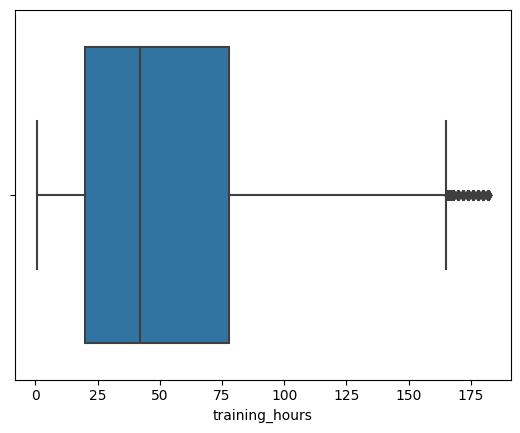

In [28]:
sns.boxplot(x = df['training_hours'])

## Imputing missing values using MICE

In [29]:
# Let's take all those features in which percentage of missing value is more than 5%
cols_more5_per = [cols for cols in df.columns if df[cols].isnull().mean()*100 >5]
Temp_df = df[cols_more5_per].copy()

In [30]:
# Let's do the mode imputation
for cols in Temp_df.columns:
    Temp_df[cols].fillna(Temp_df[cols].mode()[0],inplace=True)

In [31]:
# Create a dataframe to compare the original and imputed values of 'gender'
compare_gender = pd.concat([df['gender'].value_counts(normalize=True), Temp_df['gender'].value_counts(normalize=True)], axis=1)
compare_gender.columns = ['Original', 'After Imputation']
compare_gender

,Original,After Imputation
Male,0.902063,0.925068
Female,0.084819,0.064896
Other,0.013117,0.010036


The ratio of categorical values is changin but for now just to keep gonig we will do mode imputation

In [32]:
# Mode imputtion in the original dataframe
for cols in Temp_df.columns:
    df[cols].fillna(df[cols].mode()[0],inplace=True)

# Understanding data through visualizations

1. Does individuals with relevent experience gets more job ?
2. Does the individuals with full time enrollment gets more job than part time enrollment or no enrollment at all?
3. Individuals with which education level get most jobs ?
4. Does individuals with STEM backgroun get more jobs?
5. In which company size inidividuals gets more jobs ?
6. Which type of company hires the most ?

[Text(0.5, 1.0, 'Company type Vs Number of jobs')]

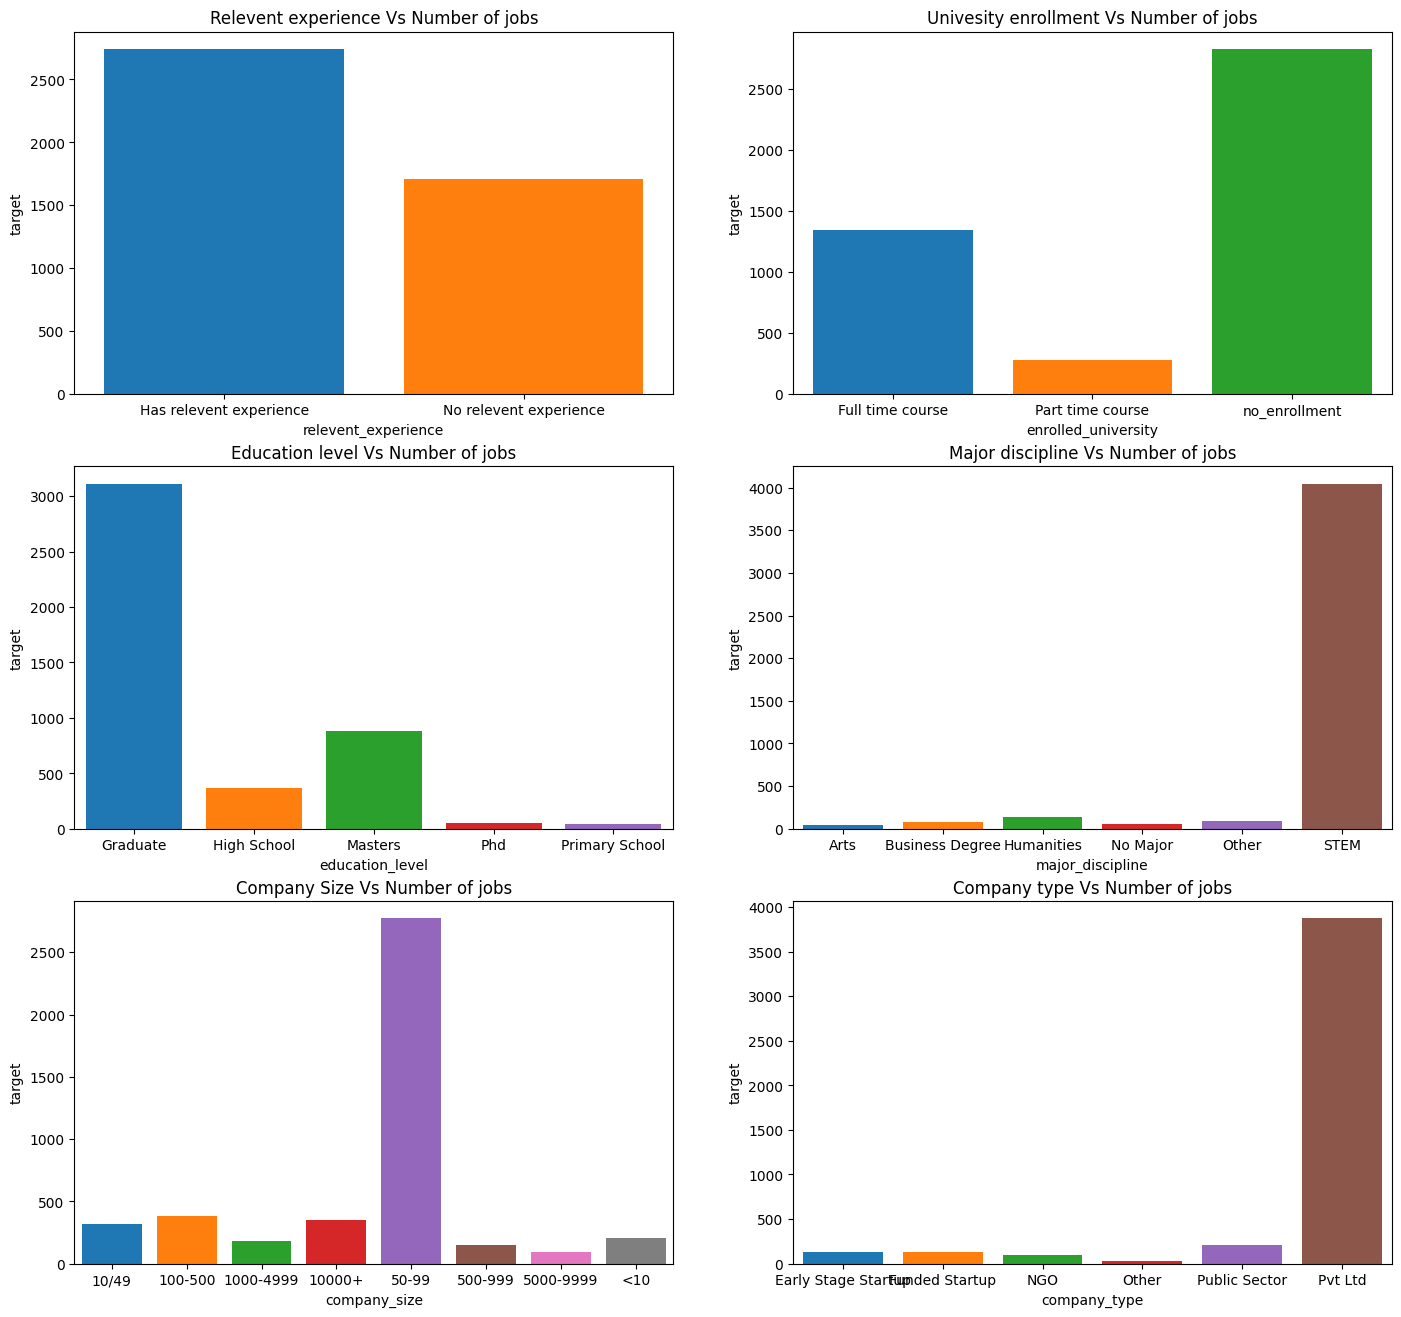

In [33]:
# Let's create subplots
fig,ax = plt.subplots(3,2 ,figsize = (17,16))

temp1 = df.groupby('relevent_experience')['target'].sum()
temp2 = df.groupby('enrolled_university')['target'].sum()
temp3 = df.groupby('education_level')['target'].sum()
temp4 = df.groupby('major_discipline')['target'].sum()
temp5 = df.groupby('company_size')['target'].sum()
temp6 = df.groupby('company_type')['target'].sum()

sns.barplot(x = temp1.index,y = temp1,ax = ax[0][0],saturation=2).set(title='Relevent experience Vs Number of jobs')
sns.barplot(x = temp2.index,y = temp2,ax = ax[0][1],saturation=2).set(title='Univesity enrollment Vs Number of jobs')
sns.barplot(x = temp3.index,y = temp3,ax = ax[1][0],saturation=2).set(title='Education level Vs Number of jobs')
sns.barplot(x = temp4.index,y = temp4,ax = ax[1][1],saturation=2).set(title='Major discipline Vs Number of jobs')
sns.barplot(x = temp5.index,y = temp5,ax = ax[2][0],saturation=2).set(title='Company Size Vs Number of jobs')
sns.barplot(x = temp6.index,y = temp6,ax = ax[2][1],saturation=2).set(title='Company type Vs Number of jobs')

# Feature engineering

- Encode the categorical variables
- Feature scaling

In [34]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols.head(5)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
1,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,Male,No relevent experience,Full time course,Graduate,STEM,50-99,Pvt Ltd
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,50-99,Pvt Ltd
4,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup


Out of all the categorical columns : enrolled_university,company_size,relevent_experience and education level are ordinal categorical columns, rest all are nominal categorical columns.

In [35]:
# Let's do ordinal encoding 
map_enrolled_uni = {'no_enrollment':1, 'Full time course':3, 'Part time course':2}
map_edu_level = {'Graduate':3, 'Masters':4, 'High School':2, 'Phd':5, 'Primary School':1}
map_exp = {'Has relevent experience':2,'No relevent experience':1}

df['enrolled_university'] = df['enrolled_university'].map(map_enrolled_uni)
df['education_level'] = df['education_level'].map(map_edu_level)
df['relevent_experience'] = df['relevent_experience'].map(map_exp)

In [36]:
# Reducing number of features
categorical_cols = df.select_dtypes(include='object')
categorical_cols.head(5)

,gender,major_discipline,company_size,company_type
0,Male,STEM,50-99,Pvt Ltd
1,Male,STEM,50-99,Pvt Ltd
2,Male,STEM,50-99,Pvt Ltd
3,Male,Business Degree,50-99,Pvt Ltd
4,Male,STEM,50-99,Funded Startup


In [37]:
major = []
for item in df['major_discipline']:
    if item in ['STEM', 'Business Degree', 'Arts', 'Humanities','Other']:
        major.append(2)
    else:
        major.append(1)
    
df.drop(columns = ['major_discipline'],inplace=True)
df['Major'] = major

In [38]:
Company_size = []
for item in df['company_size']:
    if item in ['50-99', '<10', '10/49','100-500']: # Small compnay
        Company_size.append(1)
    elif item in ['10000+', '5000-9999', '1000-4999','500-999']: # Big company
        Company_size.append(2)
    else:
        Company_size.append(0)

df.drop(columns=['company_size'], inplace=True)
df['Company_size'] = Company_size

In [39]:
Company_type = [0] * len(df)
for i, item in enumerate(df['company_type']):
    if item in ['Funded Startup', 'Early Stage Startup']: # Startup
        Company_type[i] = 'Startup'
    elif item == 'Public Sector':
        Company_type[i] = 'Public'
    elif item == 'NGO':
        Company_type[i] = 'NGO'
    elif item == 'Pvt Ltd':
        Company_type[i] = 'Private'
    else:
        Company_type[i] = 'Other'

df.drop(columns=['company_type'], inplace=True)
df['Company_type'] = Company_type

In [40]:
# One hot encoding 
df = pd.get_dummies(df,columns = ['gender','Company_type'],drop_first=True)

In [41]:
df.head(5)

,city_development_index,relevent_experience,enrolled_university,education_level,experience,training_hours,target,Major,Company_size,gender_Male,gender_Other,Company_type_Other,Company_type_Private,Company_type_Public,Company_type_Startup
0,0.920,2,1,3,20.0,36.0,1.0,2,1,1,0,0,1,0,0
1,0.776,1,1,3,15.0,47.0,0.0,2,1,1,0,0,1,0,0
2,0.624,1,3,3,5.0,83.0,0.0,2,1,1,0,0,1,0,0
3,0.789,1,1,3,0.0,52.0,1.0,2,1,1,0,0,1,0,0
4,0.767,2,1,4,20.0,8.0,0.0,2,1,1,0,0,0,0,1


<Axes: >

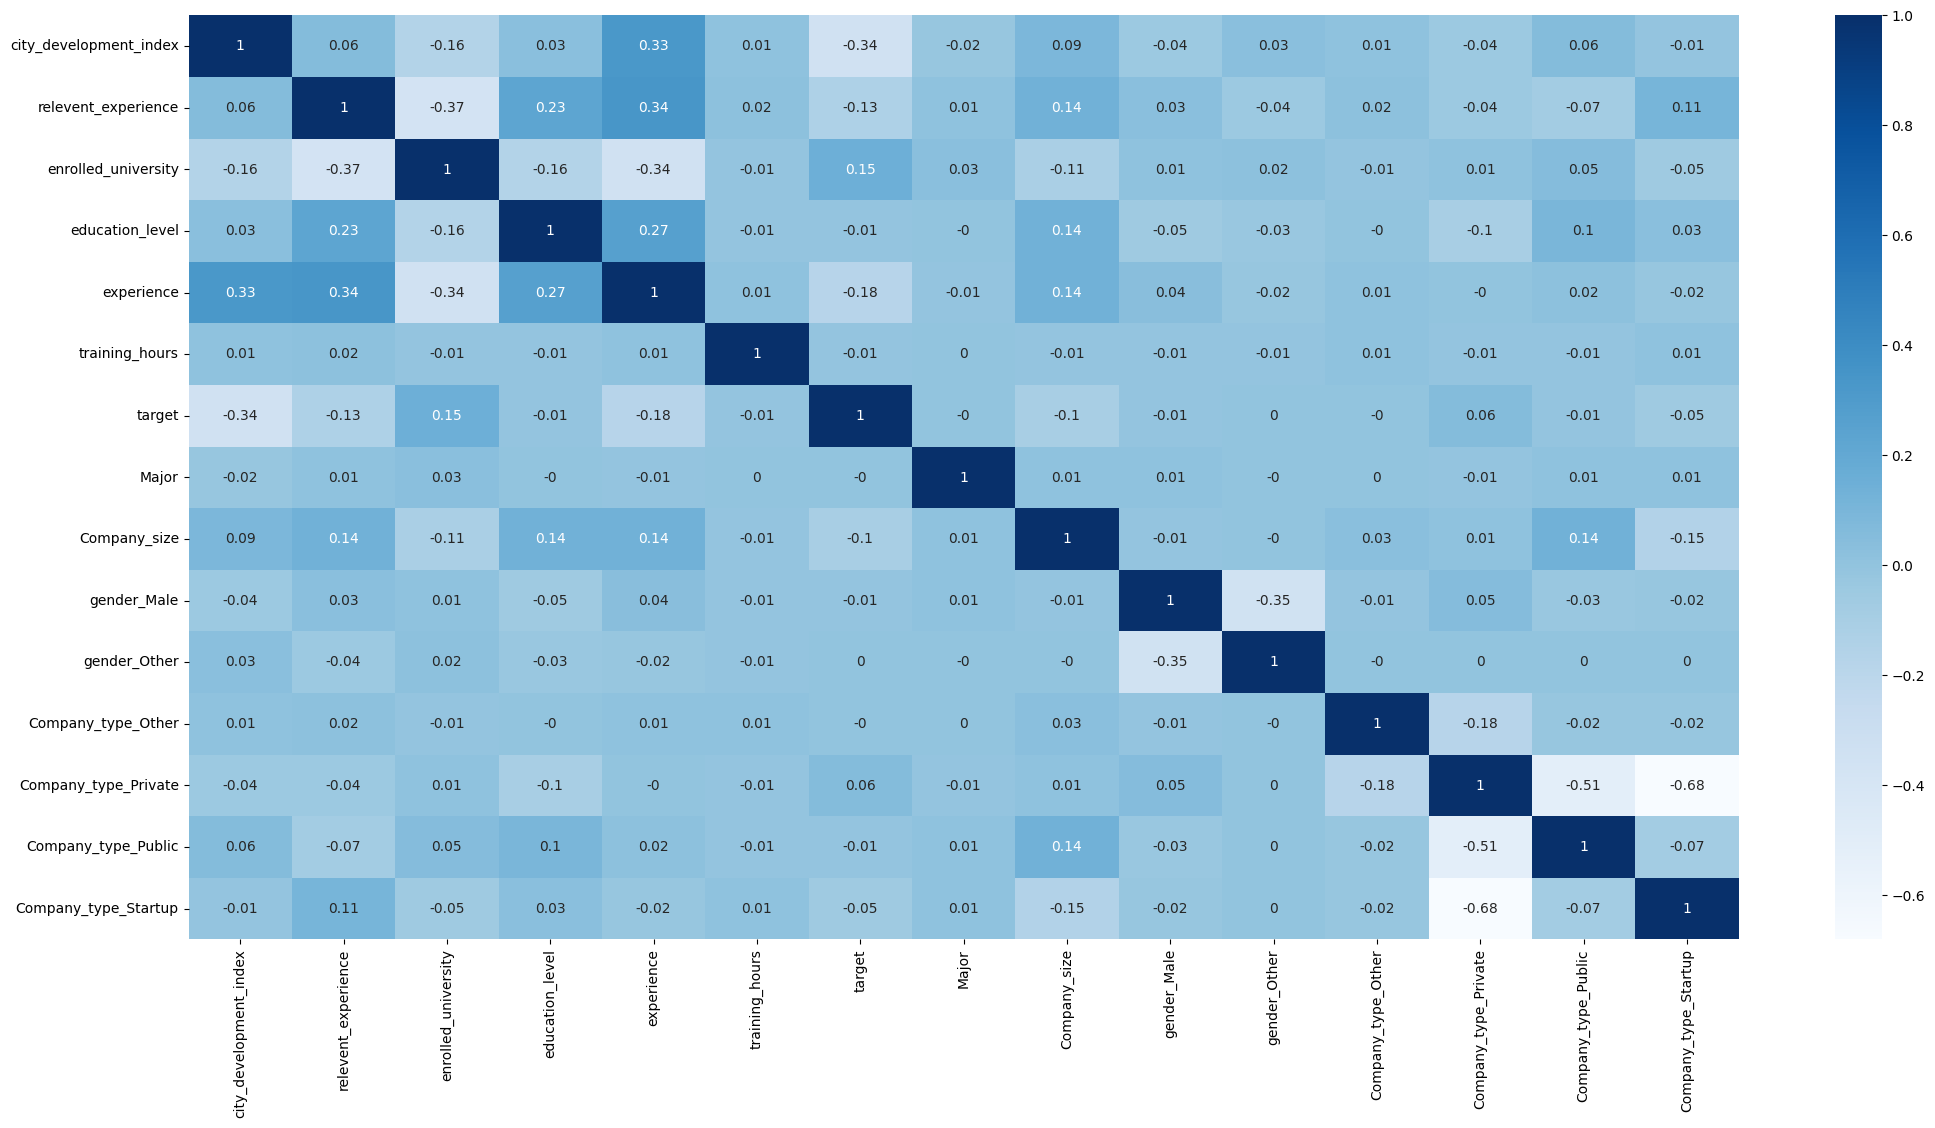

In [42]:
fig,ax = plt.subplots(figsize=(25,12))
sns.heatmap(round(df.corr(numeric_only=True),2), annot=True, cmap='Blues')

In [43]:
# Let's drop some features
df.drop(columns = ['training_hours', 'Major',
       'Company_size', 'gender_Male', 'gender_Other', 'Company_type_Other',
       'Company_type_Private', 'Company_type_Public', 'Company_type_Startup','education_level'],inplace=True)

<Axes: >

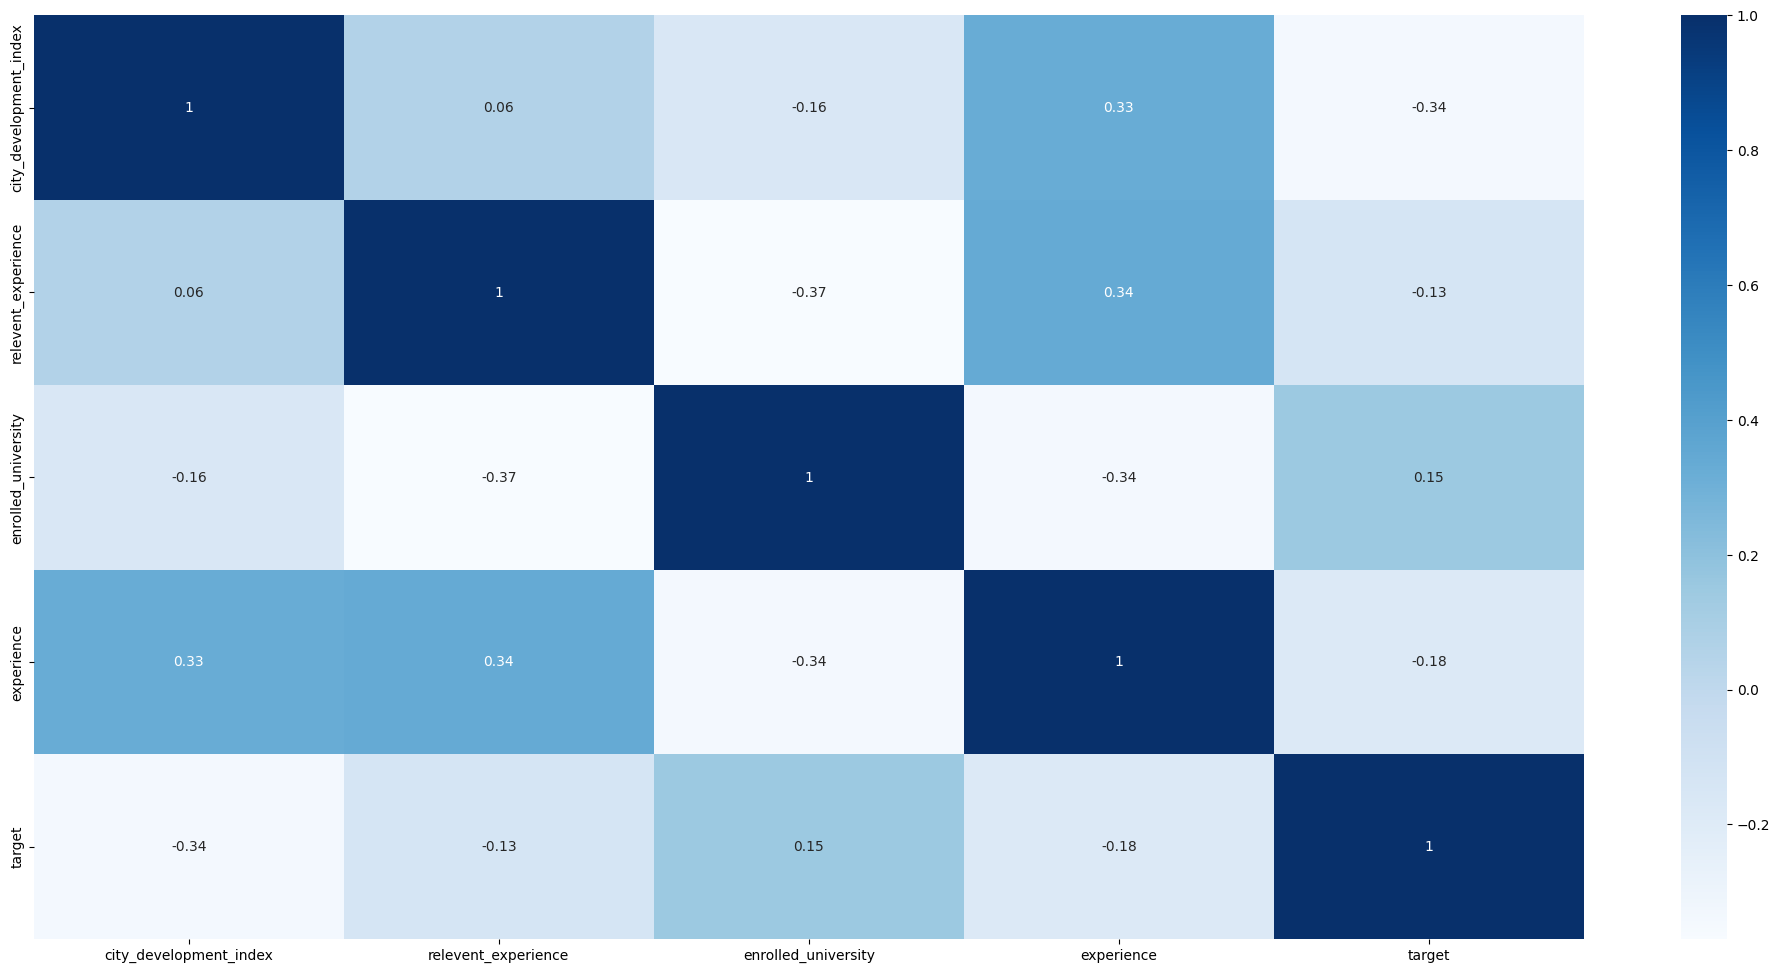

In [44]:
fig,ax = plt.subplots(figsize=(25,12))
sns.heatmap(round(df.corr(numeric_only=True),2), annot=True, cmap='Blues')

In [45]:
# Let's create an object of MinMax scaler
scaler = MinMaxScaler()

In [47]:
y = df['target']
X = df.drop(['target'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y) 

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training 

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred  =  model.predict(X_test)

C:\Users\YUVRAJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

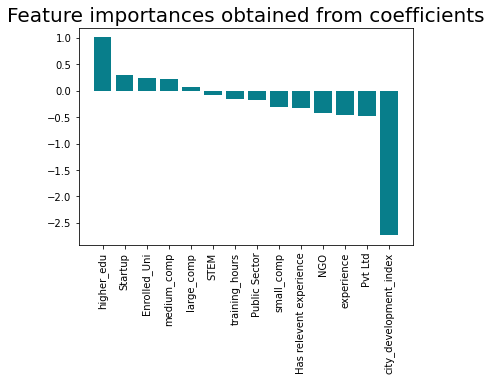

In [72]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
# Let's create an object of GaussianNB class
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred  =  classifier.predict(X_test)

In [56]:
# Now let's train the model and make predictions
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [57]:
y_pred = np.around(y_pred)
y_pred = y_pred.astype(np.int32)

# Model evaluation

In [69]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: ", precision)

# Calculating recall
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: ", recall)

# Calculating F1 score
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: ", f1)

Accuracy:  0.7693501454898157
Precision:  0.6851267244214739
Recall:  0.6030378024193548
F1 Score:  0.6143691022908293


In [43]:
'''Resulst with NB
Accuracy:  0.7668283220174588
Precision:  0.6805685519692035
Recall:  0.5922046370967742
F1 Score:  0.6007120579441181
''' 

'Resulst with NB\nAccuracy:  0.7668283220174588\nPrecision:  0.6805685519692035\nRecall:  0.5922046370967742\nF1 Score:  0.6007120579441181\n'